In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns

sns.set()

#### 42. t分布

<AxesSubplot:>

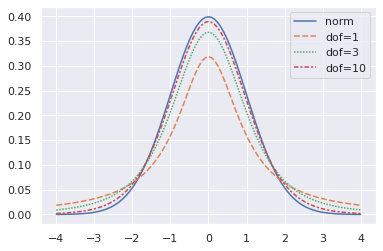

In [3]:
x = np.linspace(start=-4, stop=4, num=101)
df = pd.DataFrame(index=x)

y = stats.norm.pdf(x=x, loc=0, scale=1) #標準正規分布
df = pd.concat([df, pd.DataFrame({"norm": y}, index=x)], axis=1)

for dof in [1, 3, 10]: #自由度
    y = stats.t.pdf(x=x, df=dof, loc=0, scale=1) #t分布
    df = pd.concat([df, pd.DataFrame({f"dof={dof}": y}, index=x)], axis=1)

sns.lineplot(data=df)

#### 43. t分布による区間推定

(162.04388423678935, 177.95611576321065)

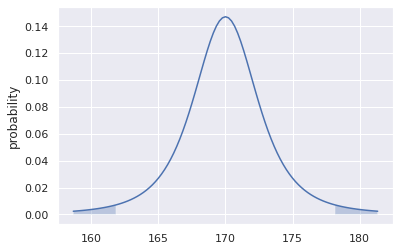

In [4]:
n = 4 #標本数
mu = 170 #標本平均 
sigma = 5 #不偏分散

mu = mu #標本平均の平均
sigma = np.sqrt(sigma**2/n) #標本平均の標準偏差

alpha = 0.95 #信頼度
ci = stats.t.interval(confidence=alpha, df=n-1, loc=mu, scale=sigma) #信頼区間

x = np.linspace(
    start=stats.t.ppf(q=0.01, df=n-1, loc=mu, scale=sigma), 
    stop=stats.t.ppf(q=0.99, df=n-1, loc=mu, scale=sigma), 
    num=101)
df = pd.DataFrame(index=x)

y = stats.t.pdf(x=x, df=n-1, loc=mu, scale=sigma)
df = pd.concat([df, pd.DataFrame({"probability": y}, index=x)], axis=1)

ax = sns.lineplot(x=df.index, y=df.probability, data=df)
ax.fill_between(
    x=df.index, y1=df.probability, 
    where=(df.index<=ci[0])|(df.index>=ci[1]), 
    alpha=0.3)

ci

#### 47. 中心極限定理を利用した区間推定

(168.21080585628283, 171.78919414371717)

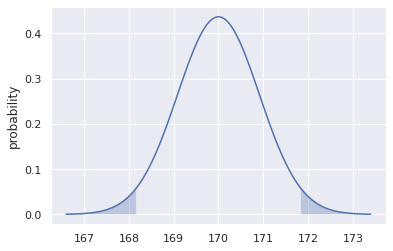

In [5]:
n = 30 #標本数
mu = 170 #標本平均 
sigma = 5 #不偏分散

mu = mu #標本平均の平均
sigma = np.sqrt(sigma**2/n) #標本平均の標準偏差

alpha = 0.95 #信頼度
ci = stats.norm.interval(confidence=alpha, loc=mu, scale=sigma) #信頼区間

x = np.linspace(
    start=stats.norm.ppf(q=0.0001, loc=mu, scale=sigma), 
    stop=stats.norm.ppf(q=0.9999, loc=mu, scale=sigma), 
    num=101)
df = pd.DataFrame(index=x)

y = stats.norm.pdf(x=x, loc=mu, scale=sigma)
df = pd.concat([df, pd.DataFrame({"probability": y}, index=x)], axis=1)

ax = sns.lineplot(x=df.index, y=df.probability, data=df)
ax.fill_between(
    x=df.index, y1=df.probability, 
    where=(df.index<=ci[0])|(df.index>=ci[1]), 
    alpha=0.3)

ci